## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2.3 million compounds. It is compiled from more than 85,000 documents, 1.5 million assays and the data spans 15,000 targets and 2,000 cells and 43,000 indications.
[Data as of July 22, 2022; ChEMBL version 31].

## **Installing libraries**

Install the ChEMBL web service package to retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client



In [ ]:
! pip install pyopenssl
! pip install ndg-httpsclient
! pip install pyasn1

## **Importing libraries**

In [3]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for COX1**

In [4]:

target = new_client.target
target_query = target.search('Cyclooxygenase-1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'PTGS1', 'xref_name': None, 'xref...",Homo sapiens,Cyclooxygenase-1,17.0,False,CHEMBL221,"[{'accession': 'P23219', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P22437', 'xref_name': None, 'xre...",Mus musculus,Cyclooxygenase-1,17.0,False,CHEMBL2649,"[{'accession': 'P22437', 'component_descriptio...",SINGLE PROTEIN,10090.0
2,"[{'xref_id': 'Q8HZR1', 'xref_name': None, 'xre...",Canis lupus familiaris,Cyclooxygenase-1,17.0,False,CHEMBL4133,"[{'accession': 'Q8HZR1', 'component_descriptio...",SINGLE PROTEIN,9615.0
3,"[{'xref_id': 'Q63921', 'xref_name': None, 'xre...",Rattus norvegicus,Cyclooxygenase-1,17.0,False,CHEMBL4042,"[{'accession': 'Q63921', 'component_descriptio...",SINGLE PROTEIN,10116.0
4,"[{'xref_id': 'O62664', 'xref_name': None, 'xre...",Bos taurus,Cyclooxygenase-1,17.0,False,CHEMBL2860,"[{'accession': 'O62664', 'component_descriptio...",SINGLE PROTEIN,9913.0
...,...,...,...,...,...,...,...,...,...
3575,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,0.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049.0
3576,[],Yellow fever virus (strain 17D vaccine) (YFV),Genome polyprotein,0.0,False,CHEMBL4523585,"[{'accession': 'P03314', 'component_descriptio...",SINGLE PROTEIN,11090.0
3577,[],Homo sapiens,IKK2/IKK1,0.0,False,CHEMBL4523969,"[{'accession': 'O14920', 'component_descriptio...",SELECTIVITY GROUP,9606.0
3578,[],Homo sapiens,Cytochrome P450,0.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606.0


### **Select and retrieve bioactivity data for *Human COX1* (first entry)**

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL221'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [8]:
df = pd.DataFrame.from_dict(res)

In [9]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34206,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,34210,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,35477,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,36217,[],CHEMBL767823,Tested in vitro for inhibition against Prostag...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,nM,UO_0000065,None,30.0
4,None,36709,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,None,23213334,[],CHEMBL4822927,Inhibition of COX-1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,ug ml-1,UO_0000274,None,186.34
4270,None,23225360,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
4271,None,23225361,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
4272,None,23225362,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [20]:
df.to_csv('COX1_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
missing value for the **standard_value** and **canonical_smiles** column, then remove the compound.

In [21]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6529/3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34206,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,34210,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,35477,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,36217,[],CHEMBL767823,Tested in vitro for inhibition against Prostag...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,nM,UO_0000065,None,30.0
4,None,36709,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,None,23213334,[],CHEMBL4822927,Inhibition of COX-1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,ug ml-1,UO_0000274,None,186.34
4270,None,23225360,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
4271,None,23225361,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
4272,None,23225362,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [22]:
len(df2.canonical_smiles.unique())

2743

In [23]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34206,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,34210,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,35477,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,36217,[],CHEMBL767823,Tested in vitro for inhibition against Prostag...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,nM,UO_0000065,None,30.0
4,None,36709,[],CHEMBL768745,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,None,23213333,[],CHEMBL4822927,Inhibition of COX-1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,ug ml-1,UO_0000274,None,245.32
4270,None,23225360,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
4271,None,23225361,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
4272,None,23225362,[],CHEMBL4825396,Inhibition of human recombinant COX-1 assessed...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-1,9606,None,None,IC50,uM,UO_0000065,None,100.0


## **Data pre-processing**

In [24]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,100000.0
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.0
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,100000.0
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,30.0
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.0
...,...,...,...
4268,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,245.32
4270,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,100000.0
4271,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.0
4272,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.0


In [25]:
df3.to_csv('COX1_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values < 1000 nM will be considered to be **active** ; > 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [26]:
df4 = pd.read_csv('COX1_02_bioactivity_data_preprocessed.csv')

In [27]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [28]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,100000.00,inactive
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,100000.00,inactive
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,30.00,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,245.32,active
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive


In [29]:
df5.to_csv('COX1_03_bioactivity_data_curated.csv', index=False)

In [30]:
! zip COX1.zip *.csv

  adding: COX1_01_bioactivity_data_raw.csv (deflated 91%)
  adding: COX1_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: COX1_03_bioactivity_data_curated.csv (deflated 84%)
  adding: COX2_01_bioactivity_data_raw.csv (deflated 91%)
  adding: COX2_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: COX2_03_bioactivity_data_curated.csv (deflated 83%)
  adding: COX2_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: COX2_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 83%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96

In [20]:
! ls -l

total 13536
-rw-rw-r--@ 1 yupuwu  staff   112887 Nov 30 06:03 Acetylcholinesterase.ipynb
-rw-rw-r--@ 1 yupuwu  staff   313244 Jan 22  2021 Acetylcholinesterase_2.ipynb
-rw-rw-r--@ 1 yupuwu  staff   208719 Jan 22  2021 Acetylcholinesterase_3.ipynb
-rw-rw-r--@ 1 yupuwu  staff   100076 Jan 22  2021 Acetylcholinesterase_4.ipynb
-rw-rw-r--@ 1 yupuwu  staff   230778 Jan 22  2021 Acetylcholinesterase_5.ipynb
-rw-r--r--  1 yupuwu  staff   580550 Nov 30 06:27 acetylcholinesterase.zip
-rw-r--r--  1 yupuwu  staff  4458046 Nov 30 06:26 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r--  1 yupuwu  staff   427580 Nov 30 06:27 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r--  1 yupuwu  staff   480873 Nov 30 06:27 acetylcholinesterase_03_bioactivity_data_curated.csv


In [31]:
df = pd.read_csv('COX1_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,100000.00,inactive
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,100000.00,inactive
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,30.00,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,245.32,active
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive


In [32]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [33]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [34]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL297008,100000.00,inactive,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1
1,CHEMBL289813,100000.00,inactive,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1
2,CHEMBL43736,100000.00,inactive,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...
3,CHEMBL140167,30.00,active,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1
4,CHEMBL44194,100000.00,inactive,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1
...,...,...,...,...
2738,CHEMBL4867901,245.32,active,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...
2739,CHEMBL1390514,100000.00,inactive,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1
2740,CHEMBL1520238,100000.00,inactive,Brc1ccc(CSc2nccn2-c2ccccc2)cc1
2741,CHEMBL1352020,100000.00,inactive,CCc1ccc(CSc2nccn2-c2ccccc2)cc1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

---

In [35]:
! pip install rdkit

In [36]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [38]:
# reference: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [39]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.406,3.85622,0.0,3.0
1,357.406,3.80782,0.0,4.0
2,469.965,6.22772,0.0,4.0
3,335.397,6.38170,1.0,0.0
4,343.423,4.24930,0.0,3.0
...,...,...,...,...
2738,485.974,6.17204,0.0,9.0
2739,334.366,5.18340,0.0,3.0
2740,345.265,4.92710,0.0,3.0
2741,294.423,4.72700,0.0,3.0


In [40]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.406,3.85622,0.0,3.0
1,357.406,3.80782,0.0,4.0
2,469.965,6.22772,0.0,4.0
3,335.397,6.38170,1.0,0.0
4,343.423,4.24930,0.0,3.0
...,...,...,...,...
2738,485.974,6.17204,0.0,9.0
2739,334.366,5.18340,0.0,3.0
2740,345.265,4.92710,0.0,3.0
2741,294.423,4.72700,0.0,3.0


In [41]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,100000.00,inactive
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,100000.00,inactive
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,30.00,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,245.32,active
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive


In [42]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,100000.00,inactive
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,100000.00,inactive
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,30.00,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,245.32,active
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive
2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,100000.00,inactive


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [43]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [44]:
df_combined.standard_value.describe()

count    2.743000e+03
mean     1.138226e+05
std      1.758776e+06
min      1.000000e+00
25%      5.000000e+03
50%      3.000000e+04
75%      1.000000e+05
max      9.000000e+07
Name: standard_value, dtype: float64

In [45]:
-np.log10( (10**-9)* 100000000 )

1.0

In [46]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [47]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

normalized standard_value 

In [48]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6529/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,inactive,311.406,3.85622,0.0,3.0,100000.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,357.406,3.80782,0.0,4.0,100000.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,inactive,469.965,6.22772,0.0,4.0,100000.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,30.00
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,100000.00
...,...,...,...,...,...,...,...,...
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,active,485.974,6.17204,0.0,9.0,245.32
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,334.366,5.18340,0.0,3.0,100000.00
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,345.265,4.92710,0.0,3.0,100000.00
2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,294.423,4.72700,0.0,3.0,100000.00


In [49]:
df_norm.standard_value_norm.describe()

count    2.743000e+03
mean     1.138226e+05
std      1.758776e+06
min      1.000000e+00
25%      5.000000e+03
50%      3.000000e+04
75%      1.000000e+05
max      9.000000e+07
Name: standard_value_norm, dtype: float64

In [50]:
df_final = pIC50(df_norm)
df_final

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6529/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,inactive,311.406,3.85622,0.0,3.0,4.000000
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,357.406,3.80782,0.0,4.0,4.000000
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,inactive,469.965,6.22772,0.0,4.0,4.000000
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,7.522879
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,active,485.974,6.17204,0.0,9.0,6.610267
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,334.366,5.18340,0.0,3.0,4.000000
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,345.265,4.92710,0.0,3.0,4.000000
2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,294.423,4.72700,0.0,3.0,4.000000


In [51]:
df_final.pIC50.describe()

count    2743.000000
mean        4.786641
std         0.973868
min         1.045757
25%         4.000000
50%         4.522879
75%         5.301030
max         9.000000
Name: pIC50, dtype: float64

In [52]:
df_final.to_csv('COX1_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**

In [53]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,inactive,311.406,3.85622,0.0,3.0,4.000000
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,357.406,3.80782,0.0,4.0,4.000000
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,inactive,469.965,6.22772,0.0,4.0,4.000000
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,7.522879
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
2737,CHEMBL4869860,Cc1ccc2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(=O)...,active,471.947,5.86362,0.0,9.0,6.838093
2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,active,485.974,6.17204,0.0,9.0,6.610267
2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,334.366,5.18340,0.0,3.0,4.000000
2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,345.265,4.92710,0.0,3.0,4.000000


In [54]:
df_2class.to_csv('COX1_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**


In [55]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

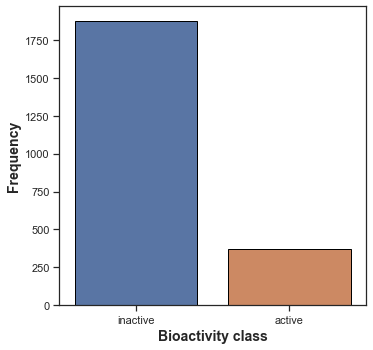

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#### **pIC50 value**

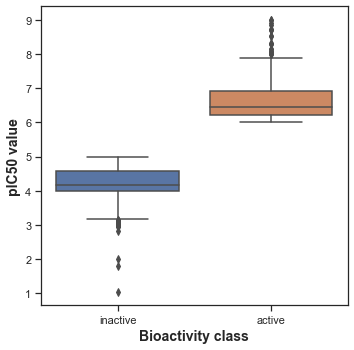

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [59]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [60]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,692613.0,3.580911e-207,0.05,Different distribution (reject H0)


#### **MW**

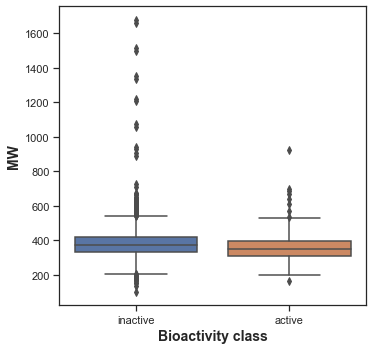

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [62]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,286286.5,1.361919e-07,0.05,Different distribution (reject H0)


#### **LogP**

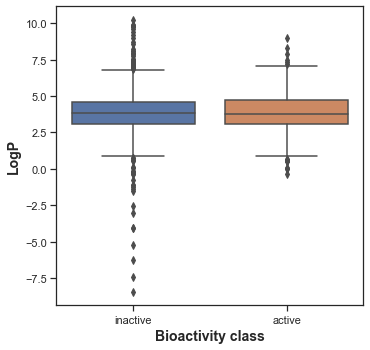

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [64]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,350620.5,0.70486,0.05,Same distribution (fail to reject H0)


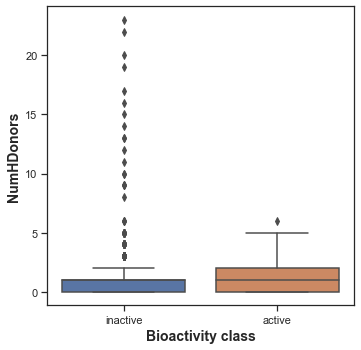

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [66]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,396428.5,0.000002,0.05,Different distribution (reject H0)


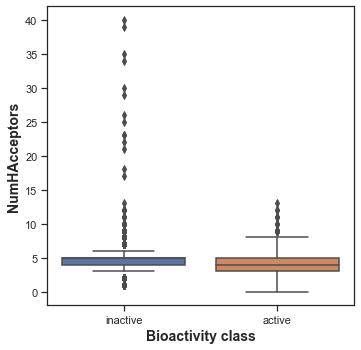

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [68]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,296103.5,0.000007,0.05,Different distribution (reject H0)


###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [51]:
! pip install wget

In [53]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [69]:
df3 = pd.read_csv('COX1_04_bioactivity_data_3class_pIC50.csv')

In [70]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,inactive,311.406,3.85622,0.0,3.0,4.000000
1,1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,357.406,3.80782,0.0,4.0,4.000000
2,2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,inactive,469.965,6.22772,0.0,4.0,4.000000
3,3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,7.522879
4,4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...,...
2738,2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,active,485.974,6.17204,0.0,9.0,6.610267
2739,2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,334.366,5.18340,0.0,3.0,4.000000
2740,2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,345.265,4.92710,0.0,3.0,4.000000
2741,2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,294.423,4.72700,0.0,3.0,4.000000


In [71]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [72]:
! cat molecule.smi | head -5

Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1	CHEMBL297008
Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1	CHEMBL289813
Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1	CHEMBL43736
Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1	CHEMBL140167
CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1	CHEMBL44194
cat: stdout: Broken pipe


In [73]:
! cat molecule.smi | wc -l

    2743


## **Calculate fingerprint descriptors**

### **Calculate PaDEL descriptors**

In [74]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [75]:
! bash padel.sh

Processing CHEMBL297008 in molecule.smi (1/4629). 
Processing CHEMBL289813 in molecule.smi (2/4629). 
Processing CHEMBL43736 in molecule.smi (3/4629). 
Processing CHEMBL140167 in molecule.smi (4/4629). 
Processing CHEMBL44194 in molecule.smi (5/4629). 
Processing CHEMBL44290 in molecule.smi (6/4629). 
Processing CHEMBL288773 in molecule.smi (7/4629). 
Processing CHEMBL44068 in molecule.smi (8/4629). 
Processing CHEMBL44367 in molecule.smi (9/4629). 
Processing CHEMBL297409 in molecule.smi (10/4629). 
Processing CHEMBL43737 in molecule.smi (11/4629). 
Processing CHEMBL43511 in molecule.smi (12/4629). 
Processing CHEMBL42801 in molecule.smi (13/4629). 
Processing CHEMBL1316 in molecule.smi (14/4629). 
Processing CHEMBL40245 in molecule.smi (15/4629). 
Processing CHEMBL43210 in molecule.smi (16/4629). 
Processing CHEMBL298231 in molecule.smi (17/4629). Average speed: 3.19 s/mol.
Processing CHEMBL44101 in molecule.smi (18/4629). Average speed: 1.63 s/mol.
Processing CHEMBL44152 in molecule

## **Preparing the X and Y Data Matrices**

In [76]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,inactive,311.406,3.85622,0.0,3.0,4.000000
1,1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,357.406,3.80782,0.0,4.0,4.000000
2,2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,inactive,469.965,6.22772,0.0,4.0,4.000000
3,3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,7.522879
4,4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...,...
2738,2738,CHEMBL4867901,Cc1cc(C)c2c(CSc3nnc(CSc4nc5cc(Cl)ccc5o4)o3)cc(...,active,485.974,6.17204,0.0,9.0,6.610267
2739,2739,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,334.366,5.18340,0.0,3.0,4.000000
2740,2740,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,345.265,4.92710,0.0,3.0,4.000000
2741,2741,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,inactive,294.423,4.72700,0.0,3.0,4.000000


In [77]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL44068,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL297409,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL43511,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1316,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL44367,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,CHEMBL4862239,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4625,CHEMBL4878422,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4626,CHEMBL4870953,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4627,CHEMBL4874336,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4625,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4626,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4627,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df3_Y = df3['pIC50']
df3_Y

0       4.000000
1       4.000000
2       4.000000
3       7.522879
4       4.000000
          ...   
2738    6.610267
2739    4.000000
2740    4.000000
2741    4.000000
2742    5.045757
Name: pIC50, Length: 2743, dtype: float64

In [80]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4625,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4626,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4627,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN


In [81]:
dataset3.to_csv('COX1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [82]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [83]:
df = pd.read_csv('COX1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [84]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["pIC50"])

X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2739,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2740,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2741,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


The ***COX1*** data set contains 881 input features and 1 output variable (pIC50 values).

In [85]:
Y = df.pIC50

Y

0       4.000000
1       4.000000
2       4.000000
3       7.522879
4       4.000000
          ...   
2738    6.610267
2739    4.000000
2740    4.000000
2741    4.000000
2742    5.045757
Name: pIC50, Length: 2743, dtype: float64

In [86]:
X.shape

(2743, 881)

In [87]:
Y.shape

(2743,)

In [88]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [89]:
X.shape

(2743, 164)

## **Data split (80/20 ratio)**

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [92]:
X_train.shape, Y_train.shape

((2194, 164), (2194,))

In [91]:
X_test.shape, Y_test.shape

((549, 164), (549,))

## **Building a Regression Model using Random Forest**


In [93]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.10751261183522987

In [94]:
Y_pred = model.predict(X_test)

/Users/yupuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

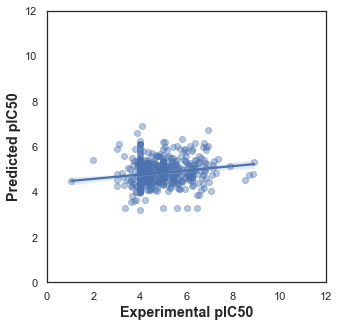

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
! pip install lazypredict

Compare model perfromance


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
import lazypredict


In [173]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(5823, 143)

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
predictions_train

In [ ]:
predictions_test

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))